# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [2]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/DS3001/visualization/main/assignment/data/college_completion.csv',
                 low_memory=False)

In [ ]:
#2
print(df.head(),'\n') #63 columns
print( df.shape, '\n') #3798 observations

In [ ]:
#3
print(pd.crosstab(df['control'],df['level']),'\n')
print(pd.crosstab(df['control'],df['level'], normalize = 'all'),'\n')

From these results, the smallest percentage of institutions are 2 year not for profit making up 1.7% of institutions. Next private and for profit institutions follow with 2 year (12%) and 4 year (13%). Following closely are public 4-year institutions at 16%. The majority of institutions, 24%, are public 2 year colleges and private not-for-profit 4 year colleges. In conclusion, most institutions are public and 4-year programs.

In [ ]:
#4
import seaborn as sns
sns.histplot(df['grad_100_value']) #histogram)

In [ ]:
sns.kdeplot(df['grad_100_value']) #kernel density plot

In [ ]:
sns.boxplot(df['grad_100_value']) #boxplot

In [ ]:
df['grad_100_value'].describe() #statistical description

In [ ]:
#5
sns.kdeplot(data=df,x='grad_100_value',hue='control')

In [ ]:
sns.kdeplot(data=df,x='grad_100_value',hue='level')

From these kernel density plots, it seems that 4-year and 2-year graduation rates are similar but 4-year graduation rates are higher. You can also see that private  not-for-profit institutions yield significantly higher graduation rates than private for-profit and public colleges.

In [ ]:
df.loc[:,['control','grad_100_value']].groupby('control').describe()

In [ ]:
df.loc[:,['level','grad_100_value']].groupby('level').describe()

From these results, I can confirm my observations from the kernel density plots. The mean graduation rates for 4-year colleges are ~33% while 2-year colleges are 22%. Continuing the private not-for-profit institutions have ~42% graduation rate while private-for-profit is ~29% and public being ~17%.

In [ ]:
#6
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')

In [ ]:
df.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()


By combining the interactions between level and control I am surprised by the 2 year private-for-profit institution coming out as 37%. This is very close to the highest graduation rates coming from the 2-year and 4-year private not-for-profit instituions with a 41% rate. The public college graduation rates in the 4-year program also increased with 25% graduation rate. I think these results bring about interesting findings because you can see how the institution's results differ when observing their whole picture.

<Axes: xlabel='aid_value', ylabel='Density'>

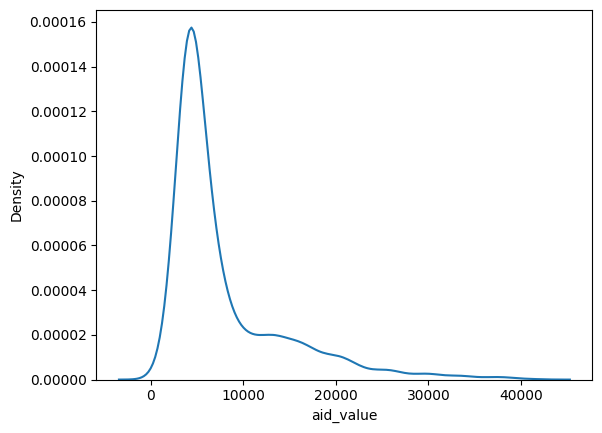

In [4]:
#7
sns.kdeplot(data=df,x='aid_value')

<Axes: xlabel='aid_value', ylabel='Density'>

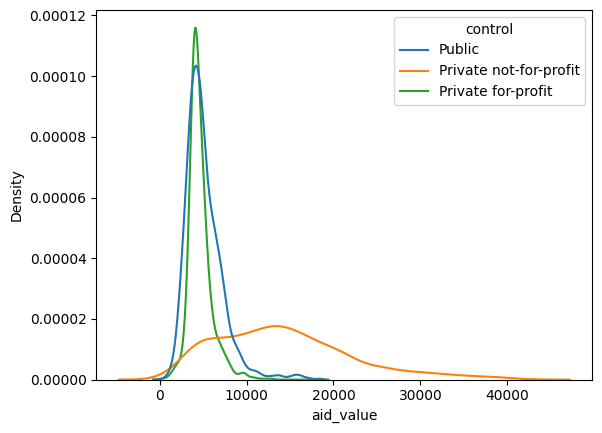

In [5]:
sns.kdeplot(data=df,x='aid_value',hue='control')

<Axes: xlabel='aid_value', ylabel='Density'>

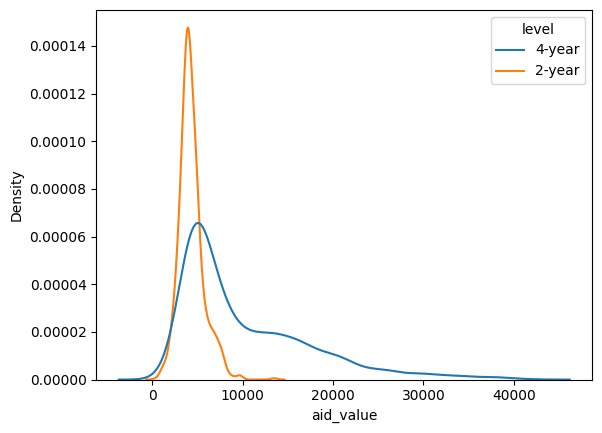

In [6]:
sns.kdeplot(data=df,x='aid_value',hue='level')

In [7]:
df.loc[:,['control','aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [ ]:
df.loc[:,['level','aid_value']].groupby('level').describe()

The shape of the graph based on the control variable reveals the significant amount of student aid students receive in private not-for-profit institutions. This control piece has a noticeably different shape when looking at that graph. The shape of the level variable graph reveals that 4 year programs tend to give more student aid rather than 2 year programs. Looking at the statistical description, it confirms that 4-year programs give significantly more student aid than 2-year programs. Also it shows that the mean value for aid given by public and private for-profit institutions are very similar. Lastly, the statistical results also confirm that private not-for-profit institutions give a significant amount of student aid to students.

In [ ]:
#8
sns.scatterplot(data=df,x='aid_value',y='grad_100_value')

In [ ]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='control')

In [ ]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level')

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.